# Build a classification decision tree

### Data

In [3]:
import pandas as pd

dementia = pd.read_csv("./dementia.csv")
dementia.columns = ["Age", "MMSE Score", "BOSTON", "Label"]
feature_columns = ["Age", "MMSE Score"]
target_column = "Label"

Explore the dataset

In [4]:
print("The first 5 patient features and diagnosis:\n")
print(dementia.head())
print("\nThe patient features' statistics:\n")
print(dementia.describe())

The first 5 patient features and diagnosis:

    Age  MMSE Score  BOSTON Label
0  87.0        19.0     6.0    AD
1  78.0        18.0    24.0    AD
2  86.0        16.0     6.0    AD
3  92.0        30.0    23.0    NC
4  84.0        20.0    26.0    AD

The patient features' statistics:

                Age    MMSE Score        BOSTON
count  16959.000000  16959.000000  16959.000000
mean      74.865853     23.793325     21.909193
std       10.729621      6.307295      7.671736
min       18.000000      0.000000      0.000000
25%       68.000000     20.000000     18.000000
50%       76.000000     26.000000     25.000000
75%       82.000000     29.000000     28.000000
max      104.000000     30.000000     30.000000


In [5]:
dementia['Label'].replace(['NC', 'AD'],
                        [0, 1], inplace=True)

/var/folders/hh/jdn4s1lx7d3ck62nlz9_r1tc0000gn/T/ipykernel_28287/2315520044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dementia['Label'].replace(['NC', 'AD'],
/var/folders/hh/jdn4s1lx7d3ck62nlz9_r1tc0000gn/T/ipykernel_28287/2315520044.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  deme

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Age', ylabel='MMSE Score'>

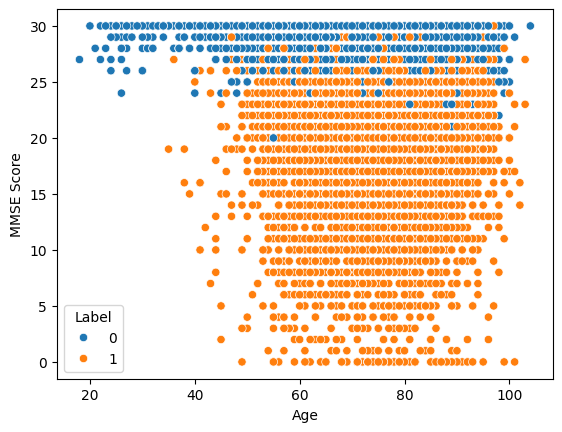

In [8]:
import seaborn as sns
sns.scatterplot(
    data=dementia,
    x=feature_columns[0],
    y=feature_columns[1],
    hue=target_column)

### Train/Test split data

In [11]:
from sklearn.model_selection import train_test_split

data, target = dementia[feature_columns], dementia[target_column]
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=42)

### Classification

#### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression()
linear_model.fit(data_train, target_train)

LogisticRegression()

/var/folders/hh/jdn4s1lx7d3ck62nlz9_r1tc0000gn/T/ipykernel_28287/2113222025.py:19: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


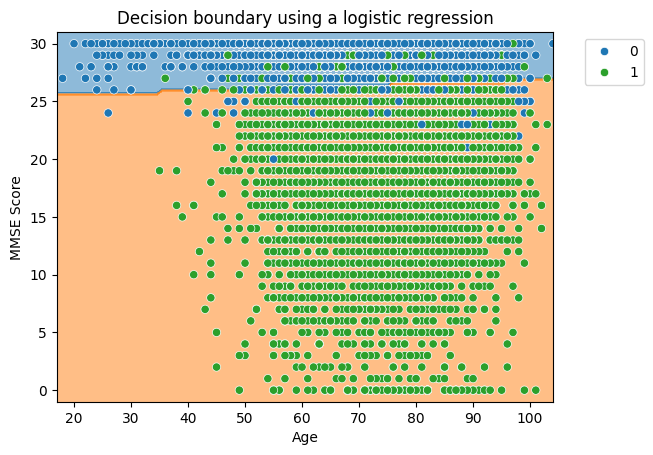

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.inspection import DecisionBoundaryDisplay

tab10_norm = mpl.colors.Normalize(vmin=-0.5, vmax=8.5)
# create a palette to be used in the scatterplot
palette = ["tab:blue", "tab:green", "tab:orange"]

dbd = DecisionBoundaryDisplay.from_estimator(
    linear_model,
    data_train,
    response_method="predict",
    cmap="tab10",
    norm=tab10_norm,
    alpha=0.5,
)
sns.scatterplot(
    data=dementia,
    x=feature_columns[0],
    y=feature_columns[1],
    hue=target_column,
    palette=palette,
)
# put the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a logistic regression")

In [14]:
linear_model.fit(data_train, target_train)
test_score = linear_model.score(data_test, target_test)
print(f"Accuracy of the LogisticRegression: {test_score:.2f}")

Accuracy of the LogisticRegression: 0.90


#### Decision Tree

/var/folders/hh/jdn4s1lx7d3ck62nlz9_r1tc0000gn/T/ipykernel_28287/1986377048.py:16: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


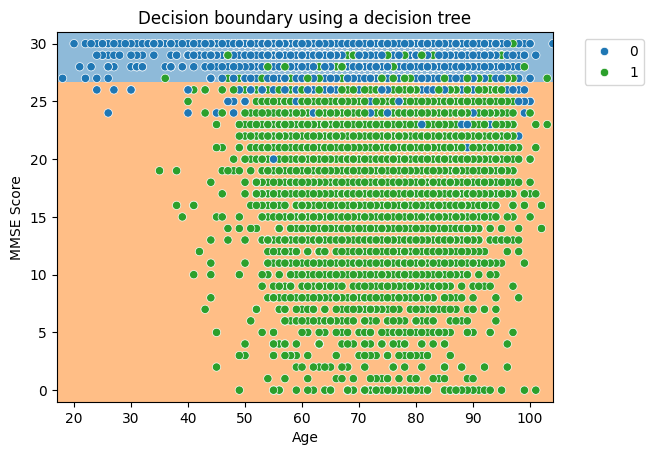

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Fit the Decision Tree
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(data_train, target_train)

# Display the boundaries
DecisionBoundaryDisplay.from_estimator(
    tree,
    data_train,
    response_method="predict",
    cmap="tab10",
    norm=tab10_norm,
    alpha=0.5,
)
sns.scatterplot(
    data=dementia,
    x=feature_columns[0],
    y=feature_columns[1],
    hue=target_column,
    palette=palette,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Decision boundary using a decision tree")

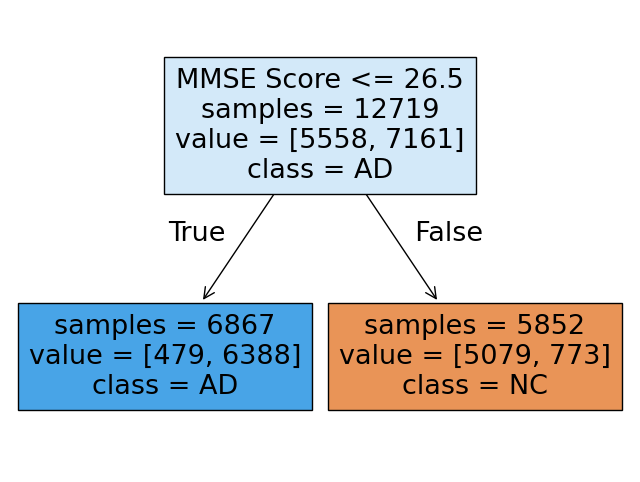

In [16]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(
    tree,
    feature_names=feature_columns,
    class_names=["NC", "AD"],
    filled=True,
    impurity=False,
    ax=ax,
)

In [17]:
tree.fit(data_train, target_train)
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.90
